# Explore here

In [2]:
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# Dimensiones

data.shape

(48895, 13)

In [3]:
# Obtener información de datos y nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* Existen un total de 48895 filas y 16 columnas, la clase a predecir es price.
* Los datos cuentan con 10 características numéricas y 6 características categóricas.
* La variable last_review y review_por_month solo tiene 38.843 instancias con valores, por lo que contendría más de 10.000 valores nulos.

In [4]:
# Eliminar duplicados

data.drop("id", axis = 1).duplicated().sum()

np.int64(0)

No hay valores duplicados con el ID, puede haber de nombre o host_id pero puede ser que un host tenga mas de una propiedad por lo tanto no es necesario trabajar con ello

In [5]:
# Valores nulos

data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Info no deseada

data.drop(["name", "host_name", "last_review"], axis = 1, inplace = True)
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


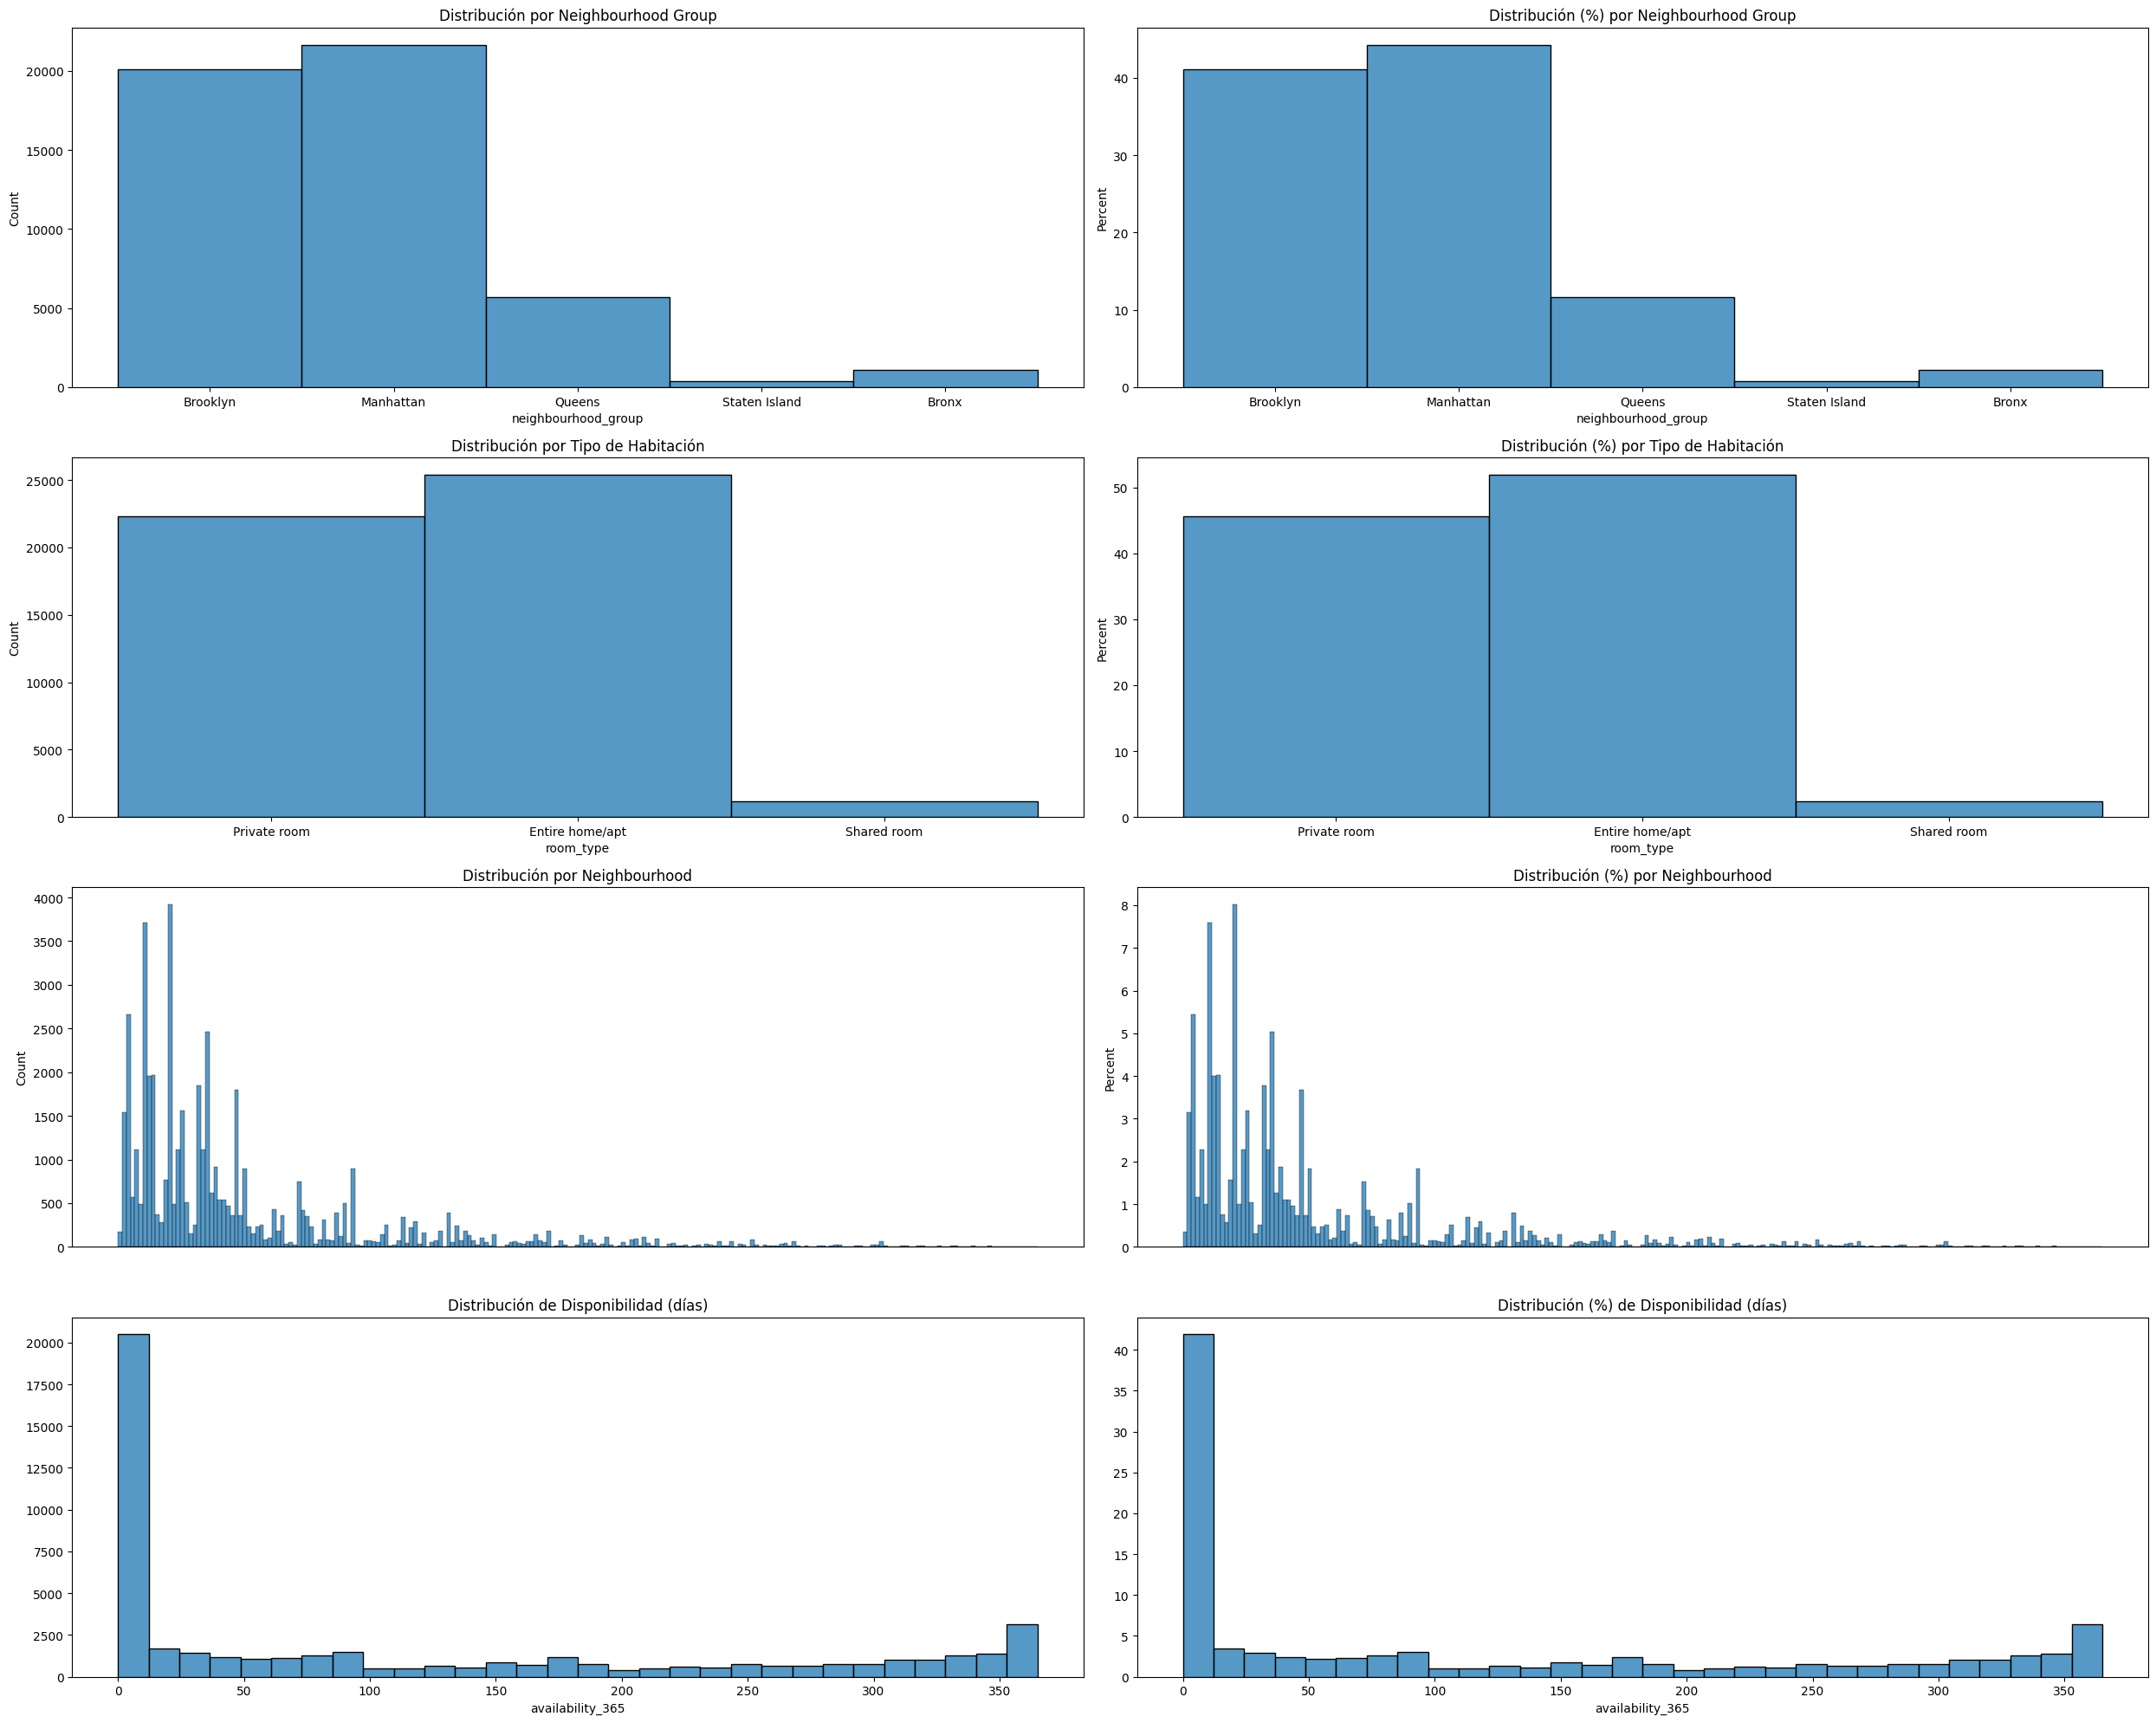

In [7]:
# Variables univariantes

import matplotlib.pyplot as plt
import seaborn as sns

# Crear subplots
fig, axis = plt.subplots(4, 2, figsize=(25, 20))

# Histograma múltiple con mejoras de visualización
sns.histplot(ax=axis[0, 0], data=data, x="neighbourhood_group").set(title="Distribución por Neighbourhood Group")
sns.histplot(ax=axis[0, 1], data=data, x="neighbourhood_group", stat="percent").set(title="Distribución (%) por Neighbourhood Group")

sns.histplot(ax=axis[1, 0], data=data, x="room_type").set(title="Distribución por Tipo de Habitación")
sns.histplot(ax=axis[1, 1], data=data, x="room_type", stat="percent").set(title="Distribución (%) por Tipo de Habitación")

sns.histplot(ax=axis[2, 0], data=data, x="neighbourhood").set(title="Distribución por Neighbourhood", xlabel=None)
axis[2, 0].set_xticks([])  # Ocultar etiquetas del eje x para claridad
sns.histplot(ax=axis[2, 1], data=data, x="neighbourhood", stat="percent").set(title="Distribución (%) por Neighbourhood", xlabel=None)
axis[2, 1].set_xticks([])  # Ocultar etiquetas del eje x

sns.histplot(ax=axis[3, 0], data=data, x="availability_365").set(ylabel=None, title="Distribución de Disponibilidad (días)")
sns.histplot(ax=axis[3, 1], data=data, x="availability_365", stat="percent").set(ylabel=None, title="Distribución (%) de Disponibilidad (días)")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


* Hay 5 grandes barrios de Ny, Manhattan y Brooklyn son los mas importantes
* Hay casi 20.000 propiedades disponibles
* Los tipos de propiedades son 3, la mayoria Entire Home, luego Private Room y shared room
* Existen 221 barrios especificios, siendo el top 5 en cantidad de propiedades:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
* El 25% no tiene minimo en cuanto a la cantidad de noches, pero el resto si.


In [8]:
data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

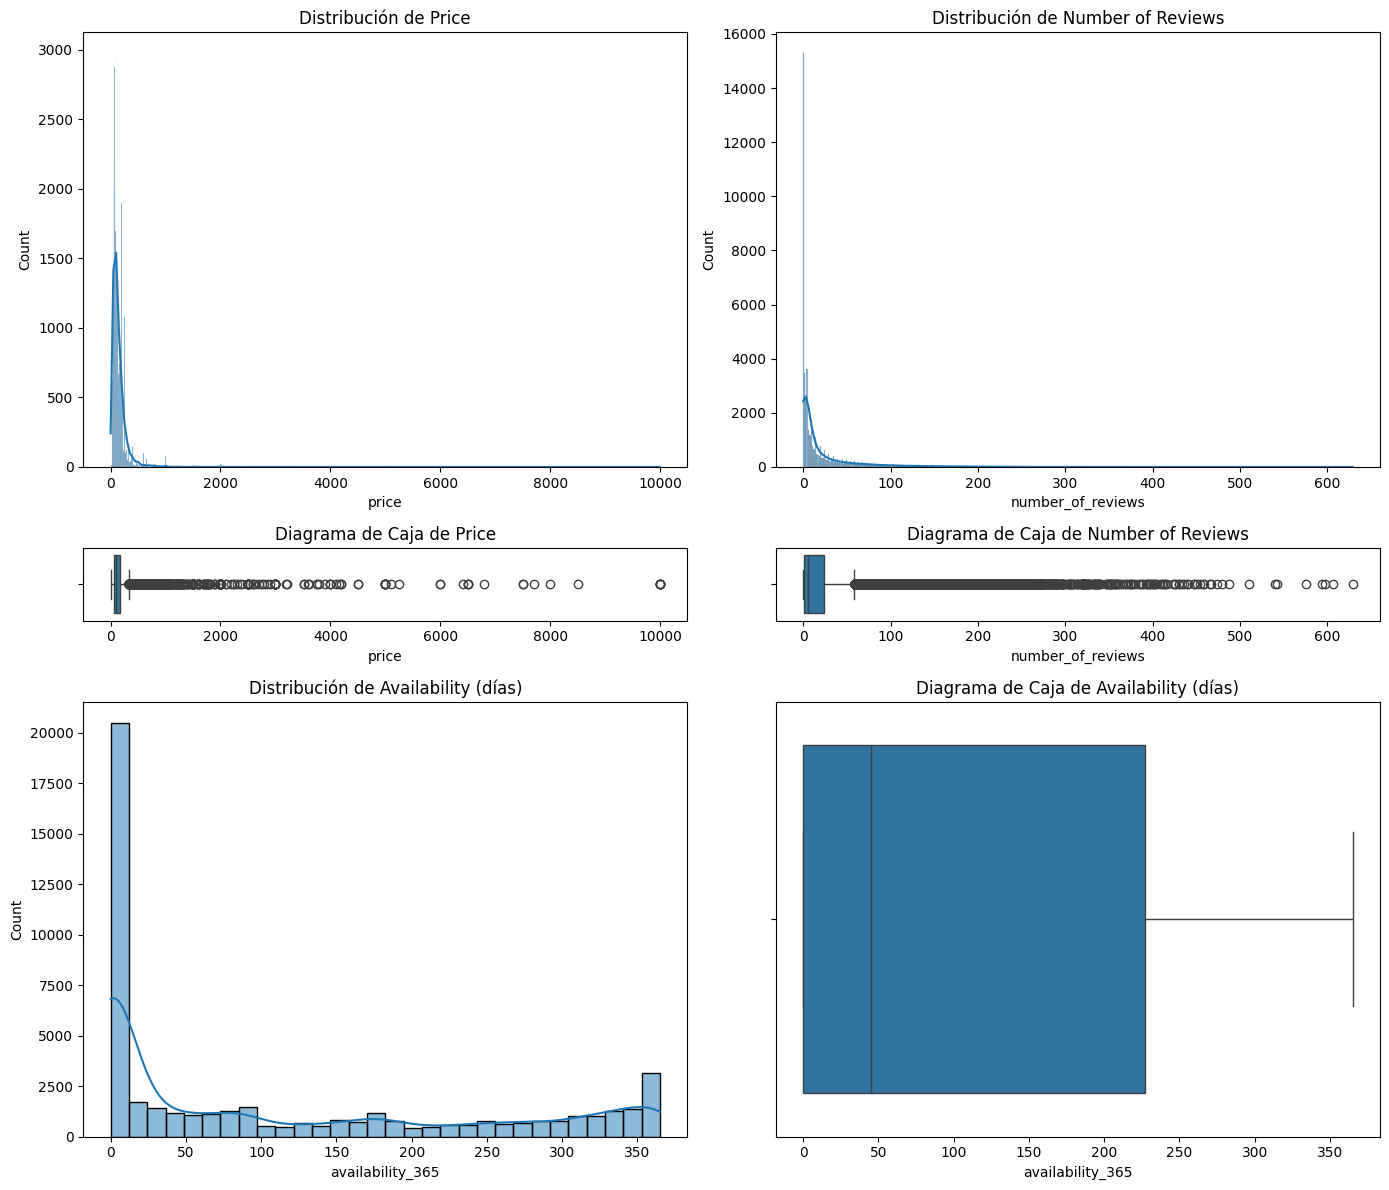

In [9]:
# Variables numericas

fig, axis = plt.subplots(3, 2, figsize=(14, 12), gridspec_kw={"height_ratios": [6, 1, 6]})

# Histograma y boxplot 'price'
sns.histplot(ax=axis[0, 0], data=data, x="price", kde=True).set(title="Distribución de Price")
sns.boxplot(ax=axis[1, 0], data=data, x="price").set(title="Diagrama de Caja de Price")

# Histograma y boxplot 'number_of_reviews'
sns.histplot(ax=axis[0, 1], data=data, x="number_of_reviews", kde=True).set(title="Distribución de Number of Reviews")
sns.boxplot(ax=axis[1, 1], data=data, x="number_of_reviews").set(title="Diagrama de Caja de Number of Reviews")

# Histograma y boxplot 'availability_365'
sns.histplot(ax=axis[2, 0], data=data, x="availability_365", kde=True).set(title="Distribución de Availability (días)")
sns.boxplot(ax=axis[2, 1], data=data, x="availability_365").set(title="Diagrama de Caja de Availability (días)")

# Ajuste del layout
plt.tight_layout()

# Mostrar
plt.show()

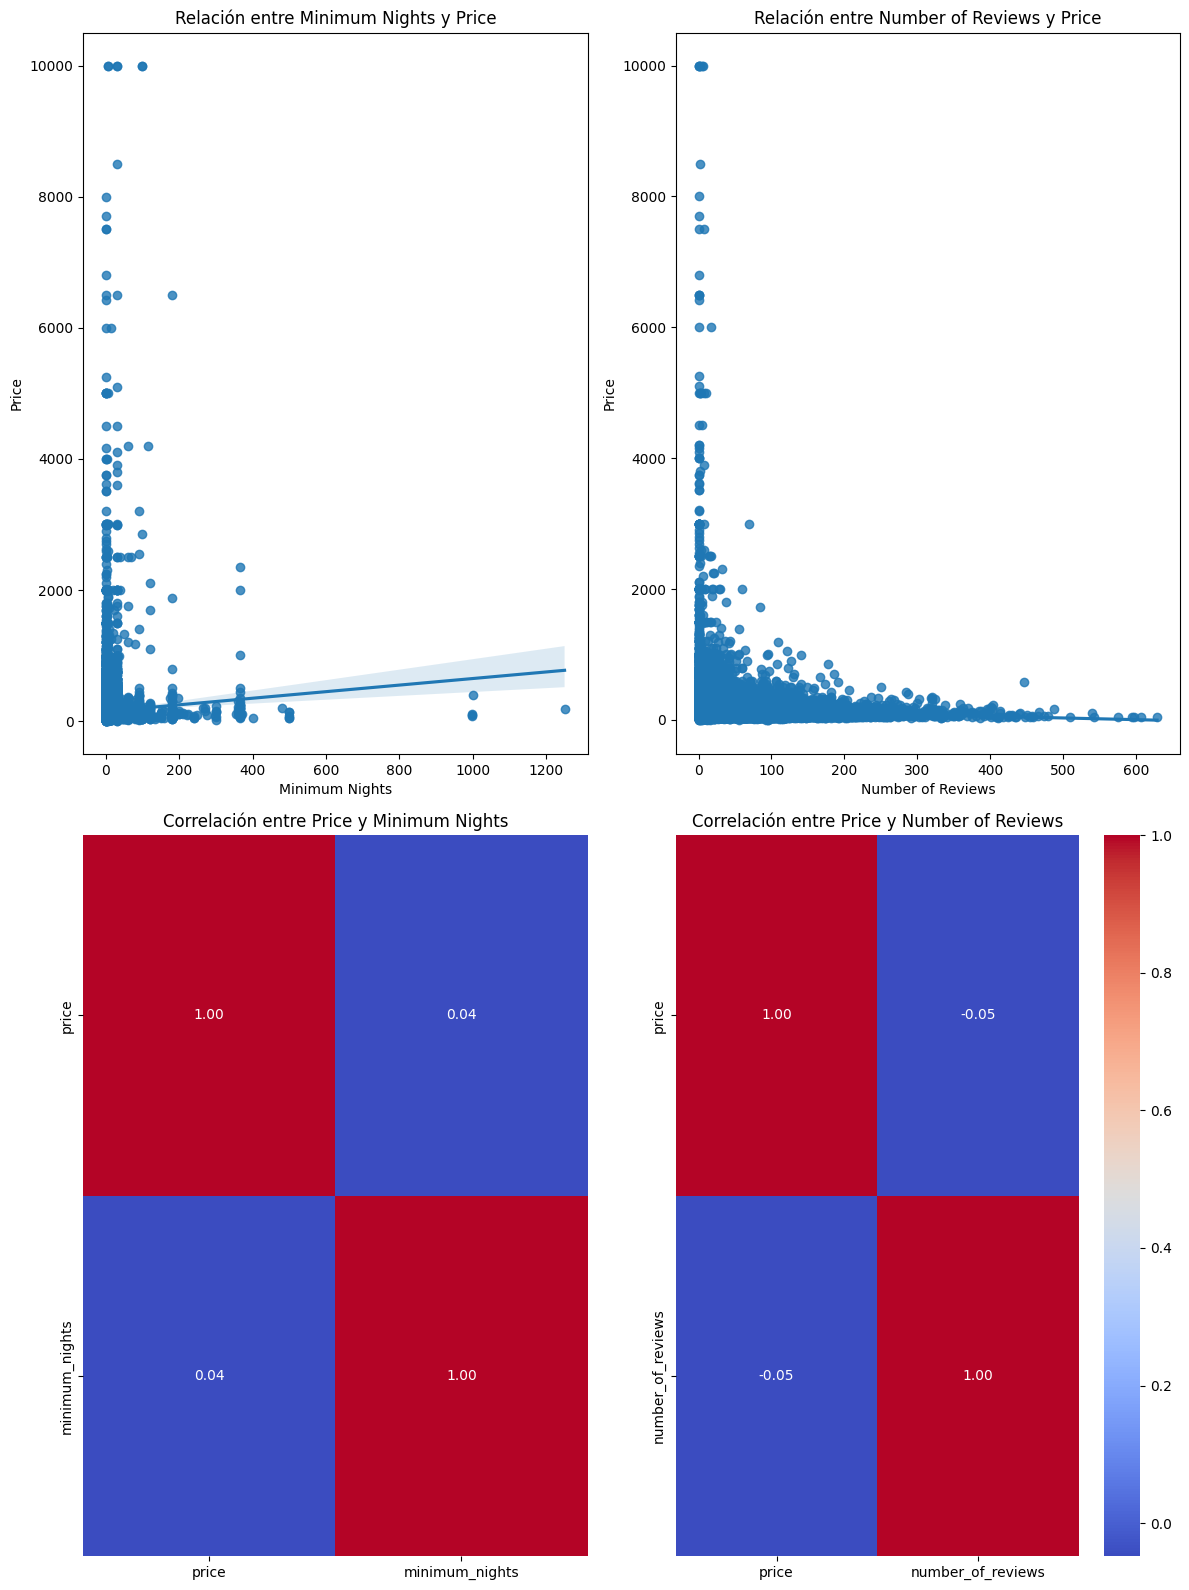

In [10]:
# Variables multivariante

fig, axis = plt.subplots(2, 2, figsize=(12, 16))

# Relación entre 'minimum_nights' y 'price' con un diagrama de regresión
sns.regplot(ax=axis[0, 0], data=data, x="minimum_nights", y="price").set(
    title="Relación entre Minimum Nights y Price", xlabel="Minimum Nights", ylabel="Price"
)

# Mapa de calor de la correlación entre 'minimum_nights' y 'price'
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=axis[1, 0], cbar=False).set(
    title="Correlación entre Price y Minimum Nights"
)

# Relación entre 'number_of_reviews' y 'price' con un diagrama de regresión
sns.regplot(ax=axis[0, 1], data=data, x="number_of_reviews", y="price").set(
    title="Relación entre Number of Reviews y Price", xlabel="Number of Reviews", ylabel="Price"
)

# Mapa de calor de la correlación entre 'number_of_reviews' y 'price'
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=axis[1, 1]).set(
    title="Correlación entre Price y Number of Reviews"
)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el plot
plt.show()

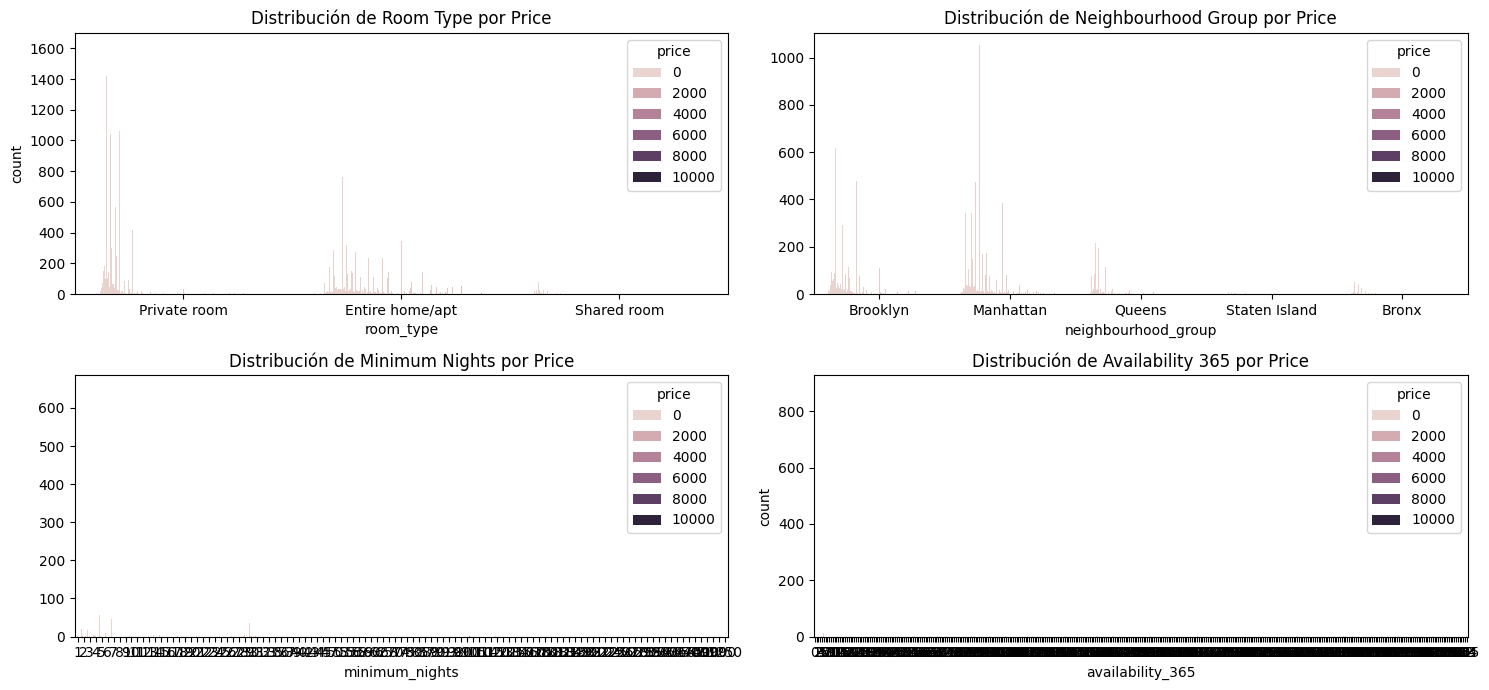

In [12]:
# Crear subplots
fig, axis = plt.subplots(2, 2, figsize=(15, 7))

# Gráficos de conteo
sns.countplot(ax=axis[0, 0], data=data, x="room_type", hue="price").set(title="Distribución de Room Type por Price")
sns.countplot(ax=axis[0, 1], data=data, x="neighbourhood_group", hue="price").set(ylabel=None, title="Distribución de Neighbourhood Group por Price")
sns.countplot(ax=axis[1, 0], data=data, x="minimum_nights", hue="price").set(ylabel=None, title="Distribución de Minimum Nights por Price")
sns.countplot(ax=axis[1, 1], data=data, x="availability_365", hue="price").set(title="Distribución de Availability 365 por Price")

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

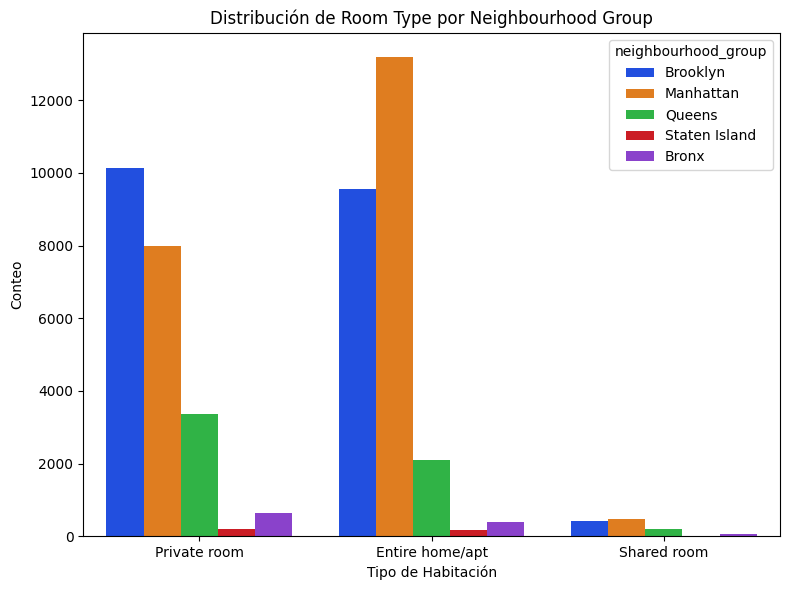

In [13]:
# Paleta y tamaño
sns.set_palette("bright")
fig, axis = plt.subplots(figsize=(8, 6))

# Gráfico de conteo
sns.countplot(data=data, x="room_type", hue="neighbourhood_group", ax=axis)

# Título y etiquetas a los ejes
axis.set_title("Distribución de Room Type por Neighbourhood Group")
axis.set_xlabel("Tipo de Habitación")
axis.set_ylabel("Conteo")

plt.tight_layout()
plt.show()

In [ ]:
# Columnas a factorizar
columns_to_factorize = ["room_type", "neighbourhood_group", "neighbourhood", 
                        "number_of_reviews", "minimum_nights", "availability_365", "price"]

# Factorización
for column in columns_to_factorize:
    data[f"{column}_f"] = pd.factorize(data[column])[0]

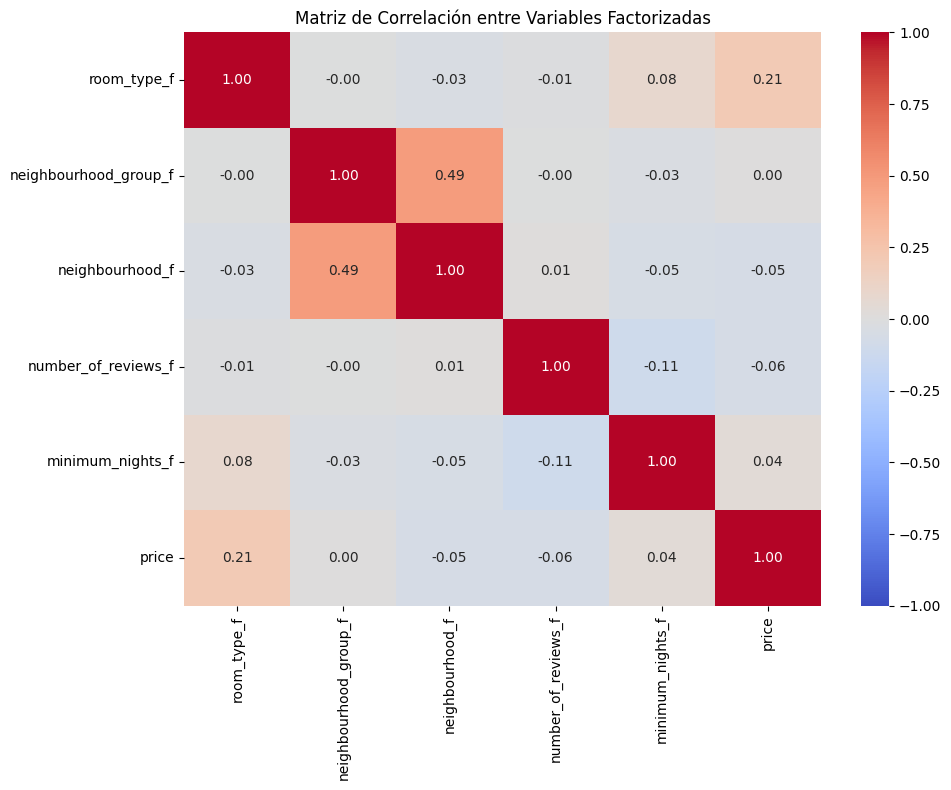

In [24]:
# Tamaños
fig, axis = plt.subplots(figsize=(10, 8))

# Matriz de correlacion
matriz_corr = data[["room_type_f", "neighbourhood_group_f", "neighbourhood_f", 
                    "number_of_reviews_f", "minimum_nights_f", "price"]].corr()

# Crear el heatmap
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axis)

# Título y ajustar etiquetas
axis.set_title("Matriz de Correlación entre Variables Factorizadas")
plt.tight_layout()

plt.show()


Existe una relación entre la tipología de clase (Room_type) y el precio

<!-- la edad del pasajero (Age) fuertemente negativa (los que viajaban en primera clase eran personas con alta edad) y entre la clase y la tarifa pagada (Fare), algo que tiene mucho sentido. El resto de correlaciones se mantienen con respecto a lo visto anteriormente. -->

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [ ]:
# Ingenieria de caracteristicas

data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f,neighbourhood_f,number_of_reviews_f,minimum_nights_f,availability_365_f,price_f
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.00000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,0.786911,29.888782,74.405133,4.680908,104.687166,72.06786
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.844386,34.676634,65.337736,6.838191,113.507109,91.33768
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000,7.500000,20.000000,0.000000,3.000000,16.00000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000,19.000000,66.000000,4.000000,60.000000,42.00000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000,37.000000,98.000000,6.000000,194.000000,83.50000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000,220.000000,393.000000,108.000000,365.000000,673.00000


/tmp/ipykernel_11637/548010745.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axis[0, 0], data=data, y="room_type_f", palette="pastel").set(title="Room Type (Factorizado)")
/tmp/ipykernel_11637/548010745.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axis[0, 1], data=data, y="neighbourhood_group_f", palette="pastel").set(title="Neighbourhood Group (Factorizado)")
/tmp/ipykernel_11637/548010745.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axis[0, 2], data=data, y="neighbourhood_f", palette="pastel").set(title="Neighb

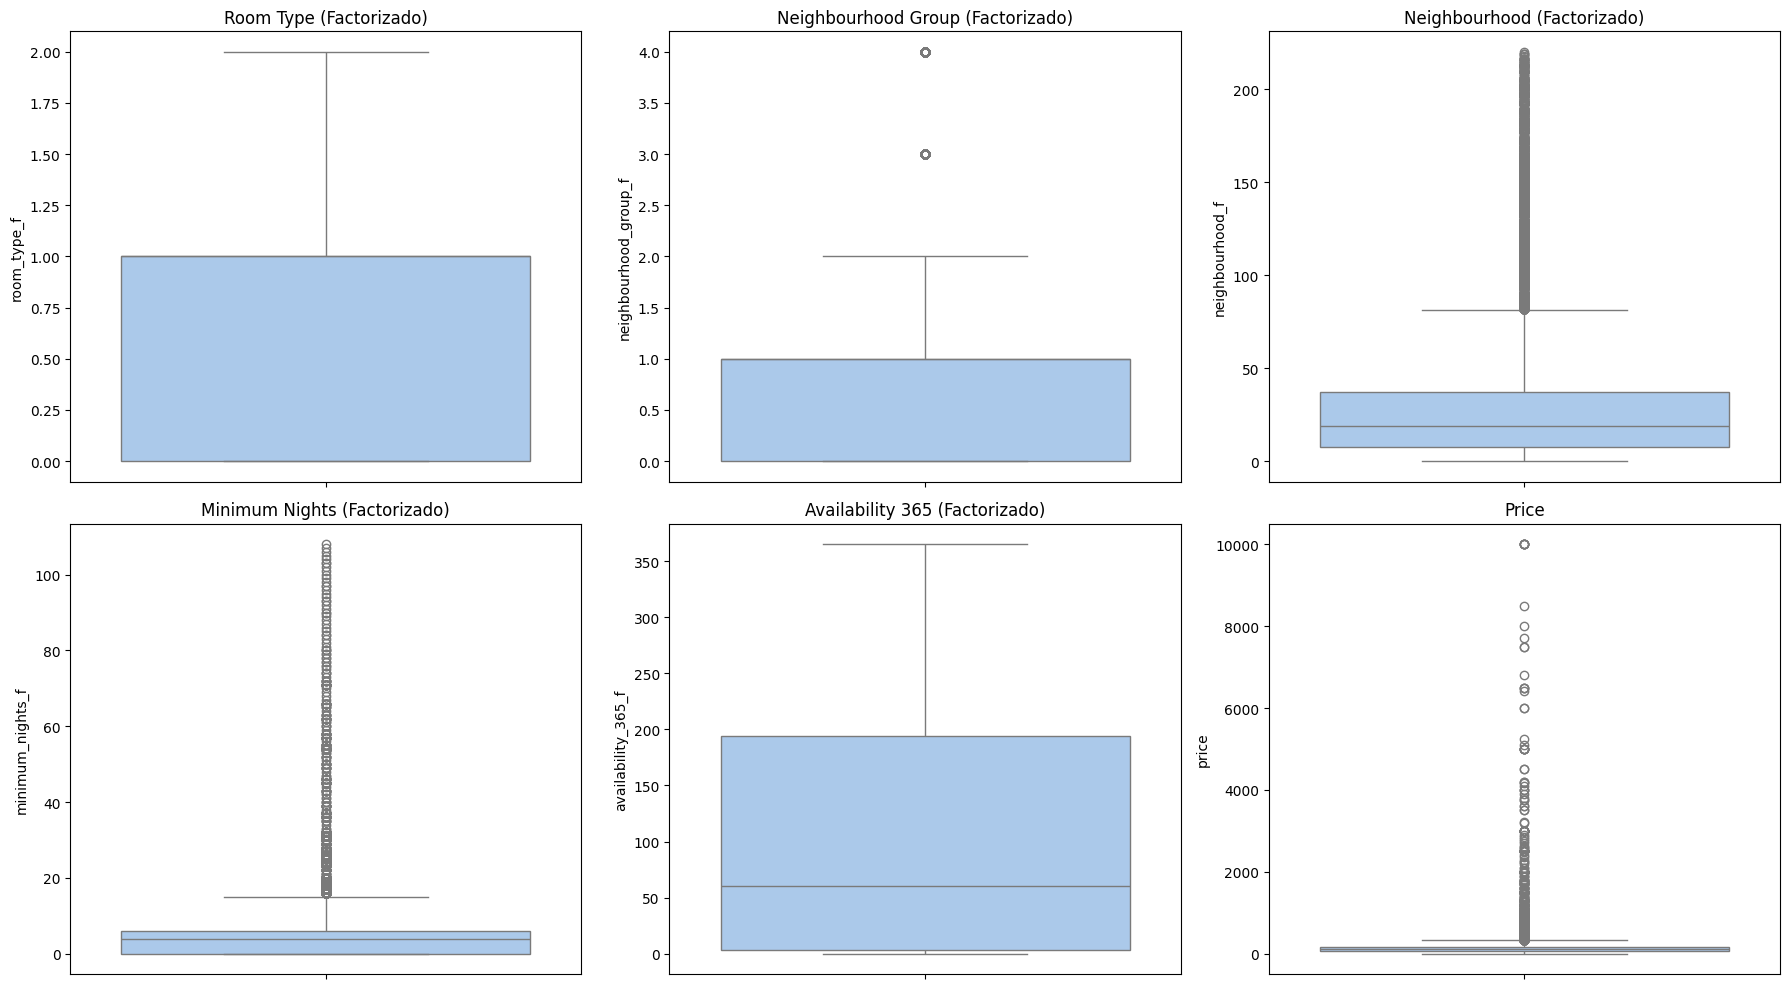

In [25]:
# Datos Atipicos

fig, axis = plt.subplots(2, 3, figsize=(18, 10))

# Crear boxplots
sns.boxplot(ax=axis[0, 0], data=data, y="room_type_f", palette="pastel").set(title="Room Type (Factorizado)")
sns.boxplot(ax=axis[0, 1], data=data, y="neighbourhood_group_f", palette="pastel").set(title="Neighbourhood Group (Factorizado)")
sns.boxplot(ax=axis[0, 2], data=data, y="neighbourhood_f", palette="pastel").set(title="Neighbourhood (Factorizado)")
sns.boxplot(ax=axis[1, 0], data=data, y="minimum_nights_f", palette="pastel").set(title="Minimum Nights (Factorizado)")
sns.boxplot(ax=axis[1, 1], data=data, y="availability_365_f", palette="pastel").set(title="Availability 365 (Factorizado)")
sns.boxplot(ax=axis[1, 2], data=data, y="price", palette="pastel").set(title="Price")

plt.tight_layout()
plt.show()

In [ ]:
# Outliers del precio

data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [26]:
data.loc[data.price==10000]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f,neighbourhood_f,number_of_reviews_f,minimum_nights_f,availability_365_f,price_f
9151,7003697,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,...,0.04,1,0,0,2,56,64,71,3,383
17692,13894339,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,...,0.16,1,0,1,0,20,49,5,3,383
29238,22436899,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,...,NaN,1,83,1,1,8,2,12,245,383


In [27]:
data.loc[data.price==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f,neighbourhood_f,number_of_reviews_f,minimum_nights_f,availability_365_f,price_f
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,...,0.05,4,28,0,0,6,68,6,244,488
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,...,2.56,4,127,0,4,168,227,4,227,488
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,...,0.71,5,0,0,0,21,61,4,3,488
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,...,0.53,2,0,0,0,20,78,4,3,488
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,...,0.15,1,73,1,0,12,97,5,305,488
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,...,4.28,6,176,0,0,6,170,0,322,488
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,...,4.37,6,232,0,0,6,197,0,142,488
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,...,4.35,6,222,0,0,6,197,0,84,488
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,...,NaN,1,0,1,1,5,2,1,3,488
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,...,0.11,6,333,2,0,21,64,12,10,488


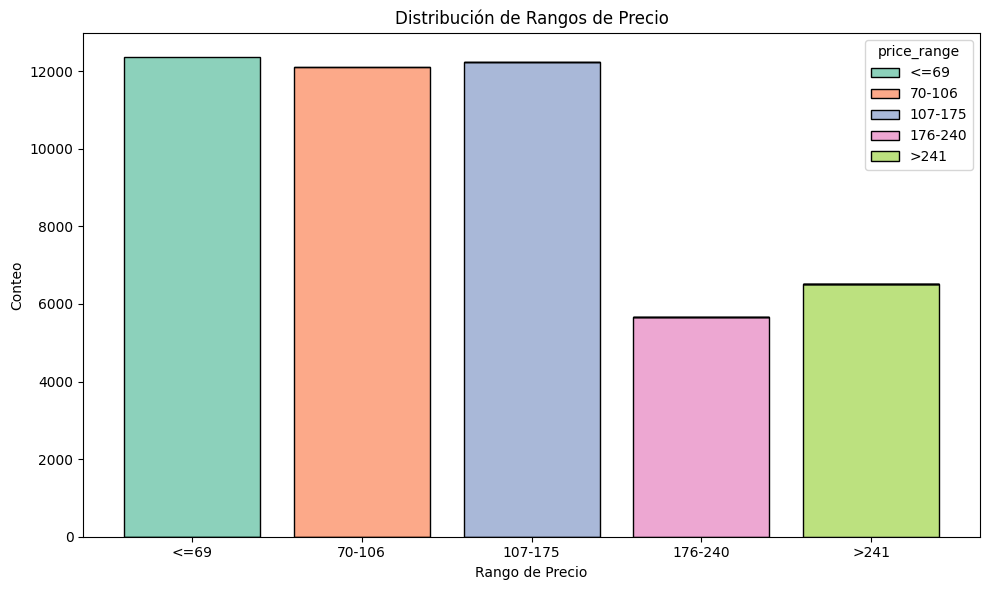

In [26]:
data['price_range'] = pd.cut(
    data['price'],
    bins=[0, 69, 106, 175, 240, float('inf')],
    labels=['<=69', '70-106', '107-175', '176-240', '>241'],
    include_lowest=True
)

# Tamaño
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

# Price_range
sns.histplot(data=data, x='price_range', hue='price_range', multiple="stack", shrink=0.8)

# Título y etiquetas
plt.title("Distribución de Rangos de Precio")
plt.xlabel("Rango de Precio")
plt.ylabel("Conteo")
plt.tight_layout()
plt.show()

In [27]:
# Estadísticas descriptivas para la columna 'price'
price_stats = data["price"].describe()

# IQR
price_iqr = round(price_stats["75%"] - price_stats["25%"], 2)

# Definir límites superior e inferior
upper_limit = round(price_stats["75%"] + 1.5 * price_iqr, 2)
lower_limit = round(price_stats["25%"] - 1.5 * price_iqr, 2)

# Contar valores atipicos
outliers_above = data[data["price"] > upper_limit].shape[0]
outliers_below = data[data["price"] < lower_limit].shape[0]

# Resultados
print(f"Rango intercuartílico (IQR) de 'price': {price_iqr}")
print(f"Límite superior para valores atípicos: {upper_limit}")
print(f"Límite inferior para valores atípicos: {lower_limit}")
print(f"Número de valores atípicos por encima del límite superior: {outliers_above}")
print(f"Número de valores atípicos por debajo del límite inferior: {outliers_below}")

Rango intercuartílico (IQR) de 'price': 106.0
Límite superior para valores atípicos: 334.0
Límite inferior para valores atípicos: -90.0
Número de valores atípicos por encima del límite superior: 2972
Número de valores atípicos por debajo del límite inferior: 0


In [80]:
data = data[data["price"] > 0]
count_0 = data[data["price"] == 0].shape[0]
count_1 = data[data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


In [ ]:
# Outliers de las noches minimas

nights_stats = data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [30]:
# IQR por noches minimas
nights_stats = data["minimum_nights"].describe()
nights_iqr = round(nights_stats["75%"] - nights_stats["25%"], 2)
upper_limit = round(nights_stats["75%"] + 1.5 * nights_iqr, 2)
lower_limit = round(nights_stats["25%"] - 1.5 * nights_iqr, 2)

# Contar valores atípicos
outliers_above = data[data["minimum_nights"] > upper_limit].shape[0]
outliers_below = data[data["minimum_nights"] < lower_limit].shape[0]

# Resultados
print(f"Rango intercuartílico (IQR) de 'minimum_nights': {nights_iqr}")
print(f"Límite superior para valores atípicos: {upper_limit}")
print(f"Límite inferior para valores atípicos: {lower_limit}")
print(f"Número de valores atípicos por encima del límite superior: {outliers_above}")
print(f"Número de valores atípicos por debajo del límite inferior: {outliers_below}")

Rango intercuartílico (IQR) de 'minimum_nights': 4.0
Límite superior para valores atípicos: 11.0
Límite inferior para valores atípicos: -5.0
Número de valores atípicos por encima del límite superior: 6607
Número de valores atípicos por debajo del límite inferior: 0


In [83]:
# Limpiando los outliers

data = data[data["minimum_nights"] <= 15]

In [31]:
count_0 = data[data["minimum_nights"] == 0].shape[0]
count_1 = data[data["minimum_nights"] == 1].shape[0]
count_2 = data[data["minimum_nights"] == 2].shape[0]
count_3 = data[data["minimum_nights"] == 3].shape[0]
count_4 = data[data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12720
Count of 2:  11696
Count of 3:  7999
Count of 4:  3303


In [33]:
# Valores faltantes
data.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
id                                    0
latitude                              0
longitude                             0
price                                 0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
room_type_f                           0
neighbourhood_group_f                 0
neighbourhood_f                       0
number_of_reviews_f                   0
minimum_nights_f                      0
availability_365_f                    0
price_f                               0
price_range                           0
dtype: int64

In [34]:
data.isnull().sum().sort_values(ascending=False) / len(data)

reviews_per_month                 0.205583
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
room_type                         0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
room_type_f                       0.000000
neighbourhood_group_f             0.000000
neighbourhood_f                   0.000000
number_of_reviews_f               0.000000
minimum_nights_f                  0.000000
availability_365_f                0.000000
price_f                           0.000000
price_range                       0.000000
dtype: float64

In [35]:
# Escalado

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Selección de variables numéricas
num_variables = ['number_of_reviews', 'neighbourhood_group_f', 'room_type_f', 
                 'minimum_nights_f', 'availability_365']

# Escalado de las variables
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[num_variables])

# Crear un DataFrame
df_scaled = pd.DataFrame(scaled_features, index=data.index, columns=num_variables)
df_scaled["price"] = data["price"]
X = df_scaled.drop("price", axis=1)
y = df_scaled["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


,number_of_reviews,neighbourhood_group_f,room_type_f,minimum_nights_f,availability_365
32645,0.017488,0.00,0.5,0.009259,0.002740
23615,0.003180,0.25,0.0,0.037037,0.000000
31183,0.000000,0.00,0.0,0.037037,0.000000
29260,0.138315,0.00,0.5,0.009259,0.731507
7275,0.020668,0.50,0.0,0.046296,0.000000


In [38]:
from sklearn.preprocessing import MinMaxScaler

# Escalar los datos de entrenamiento y prueba
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=num_variables)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=num_variables)

# Mostrar las primeras filas de X_train_scaled para verificar
X_train_scaled.head()


,number_of_reviews,neighbourhood_group_f,room_type_f,minimum_nights_f,availability_365
32645,0.017488,0.00,0.5,0.009259,0.002740
23615,0.003180,0.25,0.0,0.037037,0.000000
31183,0.000000,0.00,0.0,0.037037,0.000000
29260,0.138315,0.00,0.5,0.009259,0.731507
7275,0.020668,0.50,0.0,0.046296,0.000000
